In [319]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [320]:

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan]).any(1)
    return df[indices_to_keep]

In [321]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the files
train_data = clean_dataset(pd.read_csv("titanic/train.csv"))
test_data = pd.read_csv("titanic/test.csv")

#train_data = clean_dataset(train_data)

# test data info
test_data.info()
# train data info
train_data.info()
# Basic info of train data
train_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass  

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,455.366120,247.052476,2.00,263.5,457.0,676.0,890.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292


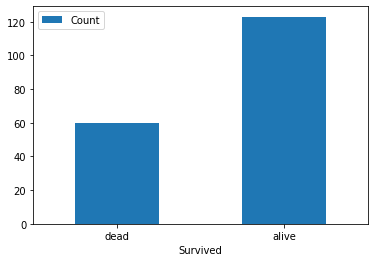

In [322]:
# Surviours plot
df = pd.DataFrame({'Survived':['dead', 'alive'], 'Count':[len(train_data.loc[train_data['Survived'] == 0]),len(train_data.loc[train_data['Survived'] == 1])]})
ax = df.plot.bar(x='Survived', y='Count',rot=0)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

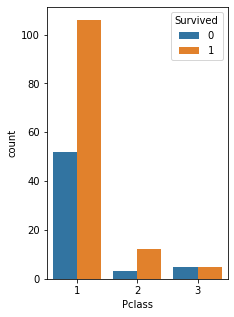

In [323]:
# plots of Survivals based on Features
plot_features = ['Pclass', 'Sex','SibSp', 'Parch','Embarked']

plt.figure(figsize=(11,11))
for i,col in enumerate(plot_features):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data=train_data,x = col,hue='Survived')
    for j in range(len(ax.containers)):
        ax.bar_label(ax.containers[j])
    plt.title(f'{col} Plot')

plt.show()

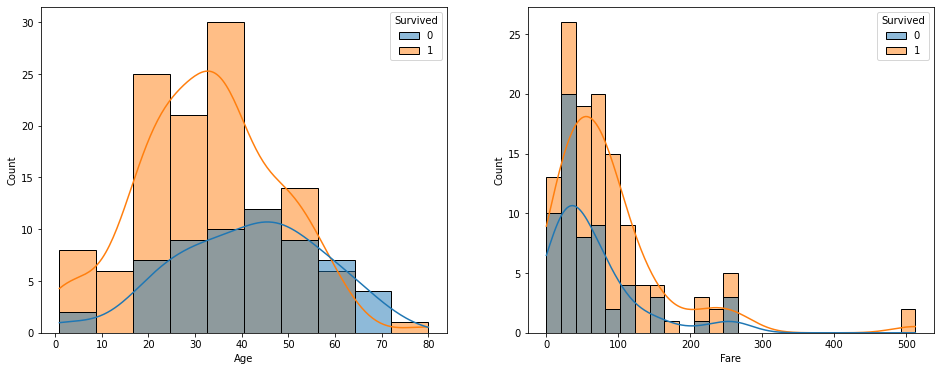

In [324]:
# plots of Survivals based on Features - Age , Fare
plt.figure(figsize = (16,6))

plt.subplot(121)
sns.histplot(data=train_data,x='Age',hue='Survived',kde=True)
plt.subplot(122)
sns.histplot(data=train_data,x='Fare',hue='Survived',kde=True)

plt.show()

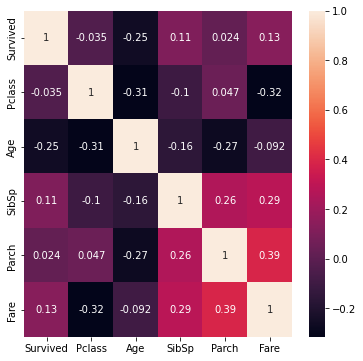

In [343]:
# Corelation heatmap for numeric features

plt.figure(figsize=(6,6))
sns.heatmap(train_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),annot=True)
plt.show()

In [358]:
#Training set

'''#.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
X_train = train_data

y_train = train_data['Survived']
#X_train = X_train.drop(['Survived'], axis=1)

#Testing set
X_test = test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

print(len(X_train))
print(len(y_train))

X_train[:10]
'''

#Training set
X_train = train_data.drop(['Survived','PassengerId','Name','Cabin','Ticket'],axis=1)
y_train = train_data['Survived']

#Testing set
X_test = test_data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

print(len(X_train))
print(len(y_train))

183
183


In [359]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder_train = pd.DataFrame(encoder.fit_transform(X_train[['Sex','Embarked']]),columns=['Sex','Embarked'])
encoder_test = pd.DataFrame(encoder.transform(X_test[['Sex','Embarked']]),columns=['Sex','Embarked'])

X_train = X_train.reset_index()
#X_train = X_train.drop(['Index'], axis=1)
encoder_train.reset_index()
X_train = pd.concat([X_train.drop(['Sex','Embarked'],axis=1),encoder_train],axis=1)
X_test = pd.concat([X_test.drop(['Sex','Embarked'],axis=1),encoder_test],axis=1)

print(len(encoder_train))

print(len(X_train))

X_train

183
183


,index,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,1,38.0,1,0,71.2833,0.0,0.0
1,3,1,35.0,1,0,53.1000,0.0,2.0
2,6,1,54.0,0,0,51.8625,1.0,2.0
3,10,3,4.0,1,1,16.7000,0.0,2.0
4,11,1,58.0,0,0,26.5500,0.0,2.0
...,...,...,...,...,...,...,...,...
178,871,1,47.0,1,1,52.5542,0.0,2.0
179,872,1,33.0,0,0,5.0000,1.0,2.0
180,879,1,56.0,0,1,83.1583,0.0,0.0
181,887,1,19.0,0,0,30.0000,0.0,2.0


In [360]:
from sklearn.impute import KNNImputer

X_train = X_train.drop(['index'], axis=1)
features = [col for col in X_train.columns]

print(len(features))
print(X_train.columns)
print(X_test.columns)

# using KNN Imputer with K=3
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=features)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns=features)


7
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'], dtype='object')


In [361]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = features)
X_test = pd.DataFrame(scaler.transform(X_test),columns = features)

In [362]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]#list that will store the average error rate value of k
k_values=[]
for i in range (2,int(np.sqrt(len(X_train)))):  #Took the range of k from 2 to Sqrt(len(train_data))
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_train)
    error_rate.append(np.mean(predict_i!=y_train))
    k_values.append(i)
error_rate

[0.14207650273224043,
 0.18032786885245902,
 0.16939890710382513,
 0.1912568306010929,
 0.1912568306010929,
 0.20765027322404372,
 0.18579234972677597,
 0.20765027322404372,
 0.21311475409836064,
 0.20765027322404372,
 0.20218579234972678]

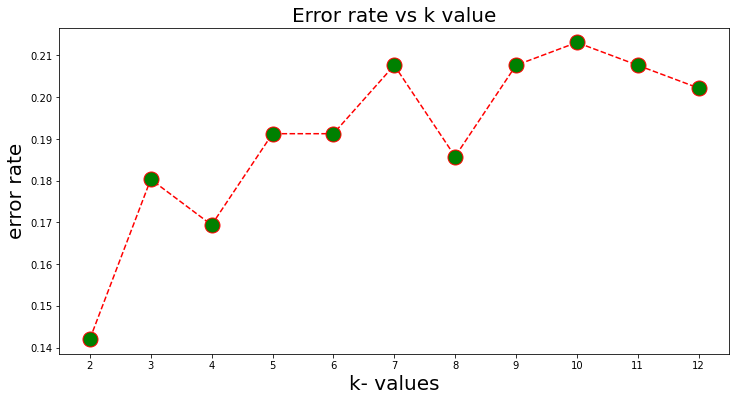

In [363]:
#plotting the error rate vs k graph 
k_end = int(np.sqrt(len(X_train)))
plt.figure(figsize=(12,6))
plt.plot(range(2,k_end),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(2,k_end))
plt.show()

In [364]:


# K-value
k = k_values[np.argmin(error_rate)]



In [365]:
# Model definition
# Setting nearest neighbours size to 3
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=k)


In [366]:
#Fitting on final model
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)



KNeighborsClassifier(n_neighbors=3)

In [367]:
#predictions on train and test
y_pred_train = neigh.predict(X_train)
y_pred_test = pd.DataFrame(neigh.predict(X_test),columns=['Survived'])

In [368]:
# Classification Report on train data set
from sklearn.metrics import classification_report
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))


Classification Report on Train Data 

               precision    recall  f1-score   support

           0       0.70      1.00      0.82        60
           1       1.00      0.79      0.88       123

    accuracy                           0.86       183
   macro avg       0.85      0.89      0.85       183
weighted avg       0.90      0.86      0.86       183



In [369]:
# Submissions
submissions = pd.concat([test_data.PassengerId,y_pred_test],axis=1)
submissions.to_csv('submission.csv',index=False)


### Logistic Regression